In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
from scipy import stats
import scipy.stats
from statsmodels.stats.proportion import proportions_ztest


%matplotlib inline
matplotlib.rc('font', family='Malgun Gothic')
plt.rc('font', family ='Malgun Gothic')

In [2]:
x = 1500
alpah = 2.2
beta = 1200

prob = stats.weibull_min.cdf(x,alpah,scale = beta)
print("P(X<=x): {:.3f}".format(1-prob))

P(X<=x): 0.195


In [3]:
n = 3
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.4)
    print("P(X={0}) = {1:.3f}".format(i,prob))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


# 포아송분포 연습

In [4]:
mu = 2
prob = stats.poisson.pmf(3,mu)
cdf_porb = stats.poisson.cdf(2,mu)
print("1분당 {0}번의 전화가 걸려올 확률:{1:.1f}".format(3,prob*100))
print("1분당 최대 {0}회 이하의 전화가 걸려올 확률:{1:.1f}".format(2,cdf_porb*100))

1분당 3번의 전화가 걸려올 확률:18.0
1분당 최대 2회 이하의 전화가 걸려올 확률:67.7


In [5]:

ds_camshaft = pd.read_csv("/home/piai/bigdata/data/camshaft.csv", engine = "python")
ds_camshaft.head()

,Length,Supp1,Supp2
0,601.4,598.0,601.6
1,601.6,599.8,600.4
2,598.0,600.0,598.4
3,601.4,599.8,600.0
4,599.4,600.0,596.8


In [6]:
data1 = ds_camshaft['Supp1']

shapiro(data1)

ShapiroResult(statistic=0.9788156747817993, pvalue=0.10744144767522812)

In [7]:
statistic,p = stats.shapiro(data1)
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic,p))

Shapiro-Wilk Test: statistic=0.9788156747817993, p-value=0.10744144767522812


In [8]:
df = pd.DataFrame({"sample":[3.6,2.9,4.5,2.6,4.3,2.6,5.3,2,3,4,3,2,4,2,1,4,1,2,5,3,2,4,2,3,5,2,4,4.5]})
df.head()

,sample
0,3.6
1,2.9
2,4.5
3,2.6
4,4.3


In [9]:
lower,upper = stats.norm.interval(0.95, loc = np.mean(df), scale = 0.397/np.sqrt(40))
print("신뢰구간:{0},{1}".format(lower.round(2),upper.round(2)))

신뢰구간:[3.03],[3.28]


In [10]:
df = pd.DataFrame({'sample':[54.1,53.3,56.1,55.7,54.0,54.1,54.5,57.1,55.2,53.8,54.1,54.1,56.1,55.0,55.9,56.0,54.9,54.3,53.9,55.0]})
lower,upper = stats.t.interval(0.95, len(df)-1, loc=np.mean(df), scale = scipy.stats.sem(df))
print("신뢰구간: ({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간: ([54.39],[55.33])


In [11]:
df = pd.DataFrame({'sample':[74.5,81.2,73.8,82.0,76.3,75.7,80.2,72.6,77.9,82.8]})


t_result = stats.ttest_1samp(df,76.7)

t,p = t_result.statistic.round(3),\
t_result.pvalue.round(3)

In [12]:
print("1-Sample t-test")
print("t 통계량:{}".format(t))
print("p-value:{}".format(p))

1-Sample t-test
t 통계량:[0.864]
p-value:[0.41]


In [13]:
df = pd.read_csv("/home/piai/bigdata/data/2sample.csv", engine = "python")
df.head()

,cust A,cust B
0,6,7
1,5,5
2,5,7
3,4,8
4,6,7


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


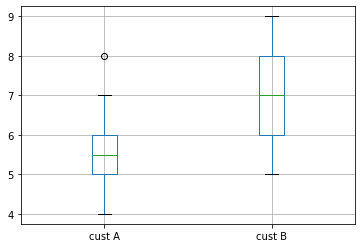

In [14]:
df.boxplot(['cust A','cust B'])

In [15]:
statistic, p = stats.shapiro(df['cust B'])
print("statistic={}, p-value={}".format(statistic,p))

statistic=0.9119446873664856, p-value=0.06941930204629898


In [16]:
stats.levene(df['cust A'], df['cust B'])

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

In [17]:
#2-Saple t-test
t_result = stats.ttest_ind(df['cust A'],df['cust B'], equal_var = True)
#2-Sample t-test t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
#2-Sample t-test t값 p값 출력
print("2-Sample t-test ")
print(" t검정통계량: {}".format(t))
print(" p-value : {}".format(p))


2-Sample t-test 
 t검정통계량: -3.596
 p-value : 0.001


In [18]:
df = pd.read_csv("/home/piai/bigdata/data/paired.csv", engine = "python")
df.head()

,before,after
0,720,810
1,589,670
2,780,790
3,648,712
4,720,810


In [19]:
#paired t-test
t_result = stats.ttest_rel(df['before'], df['after'])

#Paired t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)


#Paired t-test의 t값 p값 출력
print("Paired t-test")
print(" t 검정 통계량 = %.3f, pvalue = %.3f"% t_result)


Paired t-test
 t 검정 통계량 = -5.324, pvalue = 0.000


# Proportion test

In [20]:
count = 15
n_obs = 100
value = 0.1

stat, pval = proportions_ztest(count, n_obs,value)

print("1 Proportion test")
print('z:{0:0.3f}'.format(stat))
print('p: {0:0.3f}'.format(pval))

1 Proportion test
z:1.400
p: 0.161


# Proportion test2

In [21]:
count = np.array([4,1])
nobs = np.array([1000, 1200])
stat, pval = proportions_ztest(count,nobs)

print("2 Proportion test")
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

2 Proportion test
z:1.553
p:0.120
